In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("column_2C_weka.csv")
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.shape

(310, 7)

In [7]:
print("Number of columns: \n",df.columns.values)

Number of columns: 
 ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


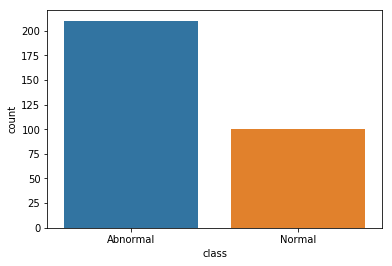

In [5]:
sns.countplot(x=df["class"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [9]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [12]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [10]:
x=df["class"]
y=df.drop("class",axis=1)

# Pairplot

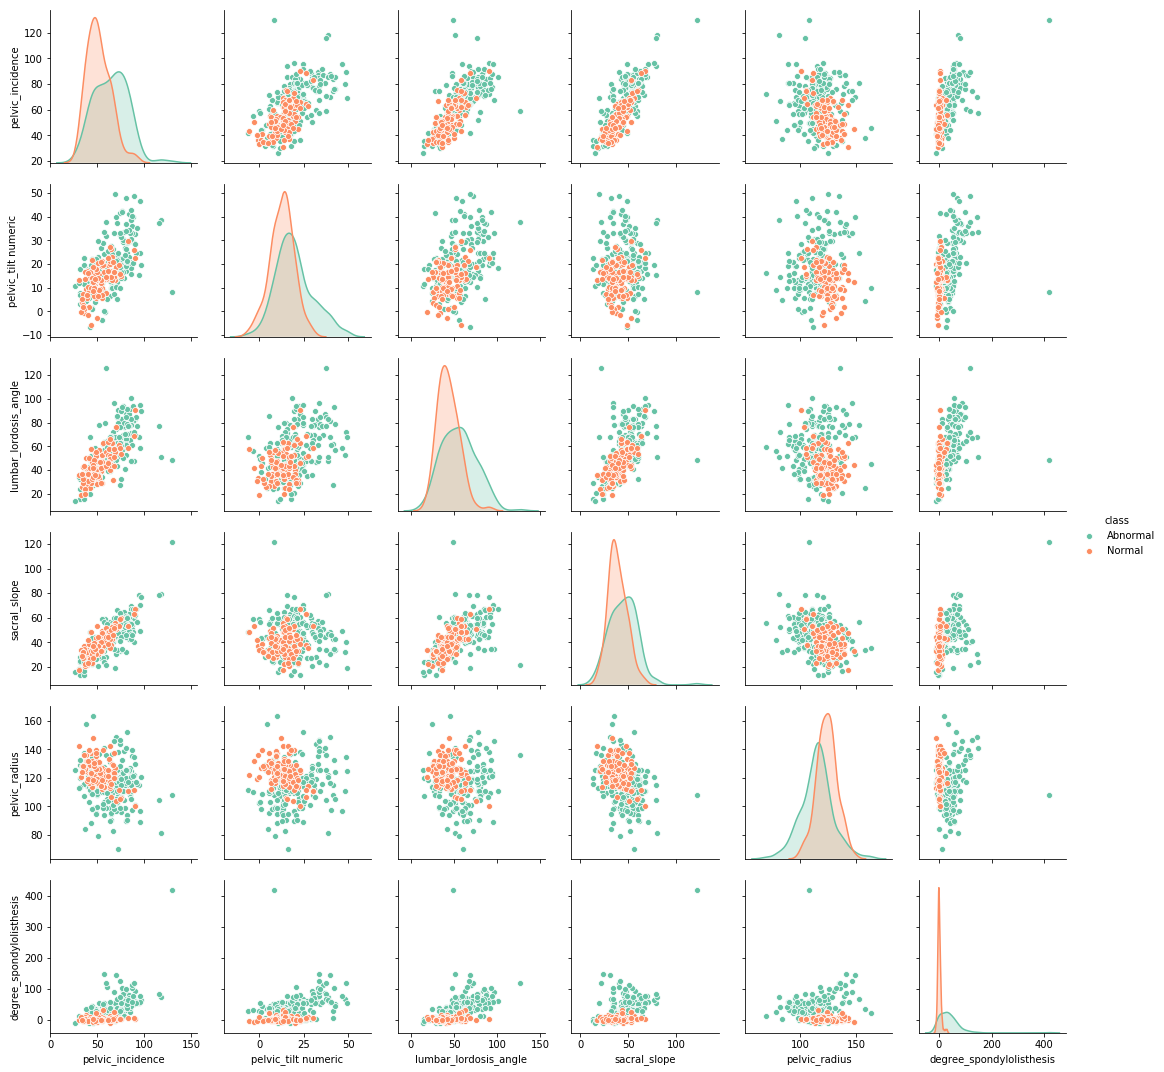

In [13]:
sns.pairplot(df,hue="class",palette="Set2")
plt.show()

In [15]:
df["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

# Since, the values are nearby.. so data balanced


# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 3)
x,y= df.loc[:,df.columns!="class"],df.loc[:,"class"]
knn.fit(x,y)
prediction=knn.predict(x)

# Measuring model performance

In [26]:
knn.score(x,y)

0.9258064516129032

In [20]:
# k is nearest neighbour count

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [35]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [36]:
knn.score(x_train,y_train)

1.0

In [38]:
knn.score(x_test,y_test)

0.8387096774193549

In [34]:
print("With KNN=3 the accuracy is :  ",knn.score(x_test,y_test))

With KNN=3 the accuracy is :   0.8602150537634409


In [40]:
prediction.shape

(93,)

In [41]:
# Model complexity

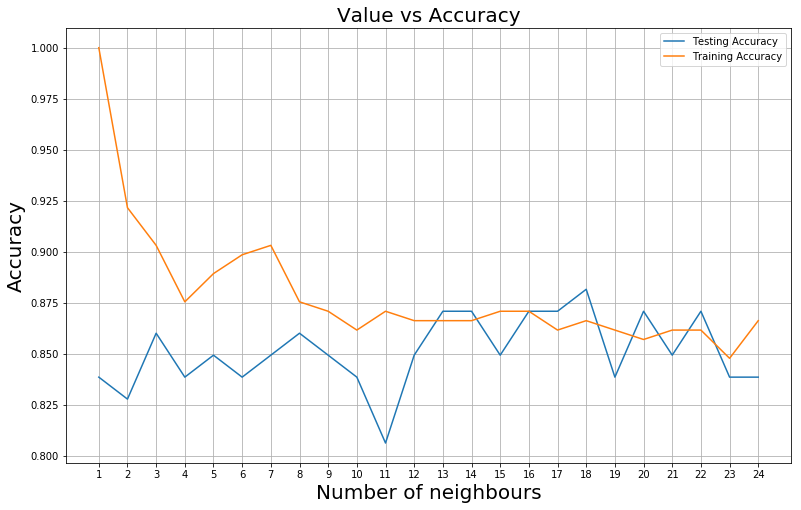

Best accuracy is 0.8817204301075269 with K=18


In [42]:
neig=np.arange(1,25)
train_accuracy=[]
test_accuracy=[]

#Loop over different values of k
for i,k in enumerate(neig):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    
plt.figure(figsize=[13,8])
plt.plot(neig,test_accuracy,label="Testing Accuracy")
plt.plot(neig,train_accuracy,label="Training Accuracy")
plt.legend()
plt.title("Value vs Accuracy",fontsize=20)
plt.xlabel("Number of neighbours",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# CASE 2:
    

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=12,p=6,metric="minkowski")
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=12, p=6,
           weights='uniform')

In [47]:
knn.score(x_train,y_train)

0.8663594470046083

In [48]:
knn.score(x_test,y_test)

0.8279569892473119

# Diabetes Dataset

In [2]:
df1=pd.read_csv("diabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score

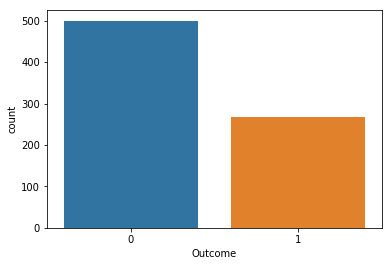

In [4]:
sns.countplot(x=df1.Outcome)

In [5]:
x=df1.drop("Outcome",axis=1)
y=df1.Outcome

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
np=GaussianNB()
np.fit(x_train,y_train)
prediction=np.predict(x_test)

In [8]:
np.score(x_test,y_test)

0.7835497835497836

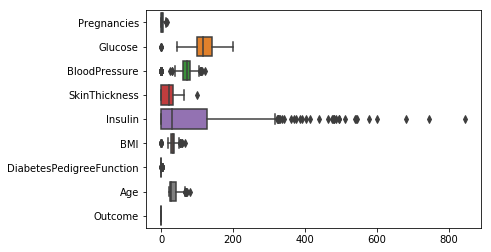

In [13]:
sns.boxplot(data=df1,orient="h")

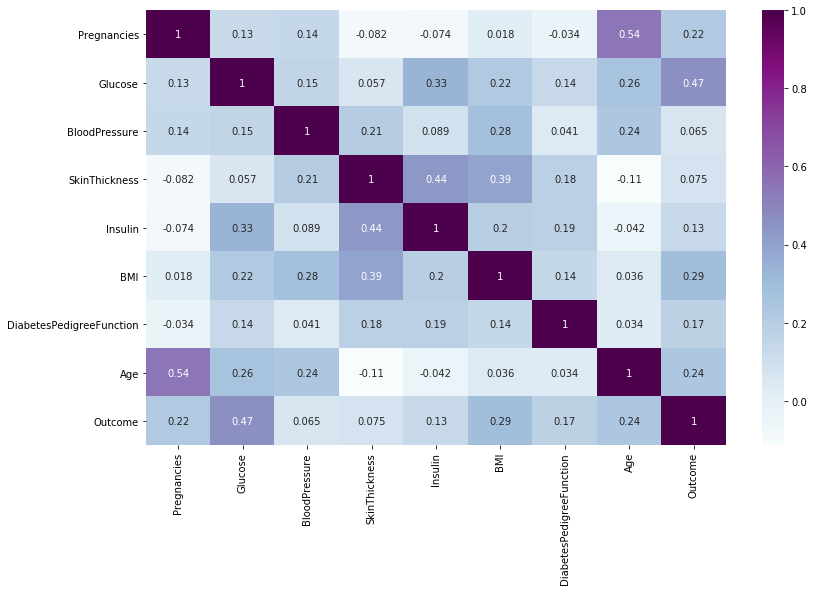

In [14]:
corr=df1[df1.columns].corr()
plt.figure(figsize=[13,8])
sns.heatmap(corr,annot=True,cmap="BuPu")

In [62]:
x=df1.drop("Outcome",axis=1)
y=df1.Outcome

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

/Users/shriyagupta/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shriyagupta/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/shriyagupta/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shriyagupta/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [65]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
np=GaussianNB()
np.fit(x_train,y_train)
prediction=np.predict(x_test)

In [18]:
x_test=sc.fit_transform(x_test)

/Users/shriyagupta/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shriyagupta/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
np.score(x_test,y_test)

0.35714285714285715

In [17]:
cm=confusion_matrix(y_test,prediction)
cm


ValueError: Found input variables with inconsistent numbers of samples: [154, 231]

# Classifier Invoking